In [4]:
%pylab inline

import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import statistics
import pickle

import sys
sys.path.append("../")
from datetime import time
import pandas as pd
import pandas_market_calendars as mcal

Populating the interactive namespace from numpy and matplotlib


/home/iii/miniconda3/envs/ml/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
# HIGH VOLUME AND HIGH OPEN OPTION INTEREST SECURITIES
#https://www.barchart.com/options/most-active/stocks

total = [
    'AAL', 'AAPL', 'ACB', 'ADBE', 'AMC', 'AMD', 'AMGN', 'AMZN',
    'ATVI', 'AXP', 'BA', 'BABA', 'BAC', 'BLNK', 'BYND', 'C',
    'CAT', 'CCL', 'CHWY', 'COST', 'COTY', 'CRM', 'CSCO', 'CVS',
    'CVX', 'BSX',
    
    
    'DAL', 'DIS', 'DKNG', 'DOW', 'EEM', 'F', 'FB',
    'FCEL', 'FTAI', 'GE', 'GM', 'GOLD', 'GRPN', 'GS', 'HD',
    'HON', 'HYG', 'HYLN', 'IBM', 'INO', 'INTC', 'JD', 'JMIA',
    'JNJ', 'JPM', 'JWN', 'KNDI', 'KO', 'KSS', 'LI', 'LOW',
    'LYFT', 'M', 'MARA', 'MCD', 'MGM', 'MMM', 'MRK', 'GOOG',
    'MRNA', 'MRO', 'MSFT', 'MU', 'NCLH', 'NFLX', 'NKE', 'NKLA',
    'NVDA', 'OXY', 'PBR', 'PCG', 'PDD', 'PENN', 'PG', 'PINS',
    'PLTR', 'PLUG', 'PTON', 'QCOM', 'QQQ', 'RIDE', 'RIOT', 'RKT',
    'ROKU', 'SBUX', 'SDC', 'SLV', 'SNAP', 'SNOW', 'SOLO', 'SONO',
    'SPCE', 'SPY', 'SQ', 'T', 'TEAM', 'TGT', 'TRV', 'TSLA', 'PFE',
    'TWTR', 'UAL', 'UBER', 'UNH', 'V', 'VALE', 'VZ', 'WBA', 'ABT',
    'WFC', 'WKHS', 'WMT', 'WYNN', 'X', 'XOM', 'XPEV', 'ZM', 'ABBV',
    'LLY', 'LMT', 'INTU', 'AMT', 'MS'
]

In [77]:
tk = yf.Ticker('GE')

In [84]:
goo = tk.option_chain('2023-01-20')[0]

za = pd.DataFrame()

n = tk.history().iloc[0]['Close']
p = ''.join(str(n).split('.')[0]+'.'+str(n).split('.')[1][:2])

za['price'] = p
za['price_'] = p
za['strike'] = goo['strike']
za['bid'] = goo['bid']
za['ask'] = goo['ask']
za['spread'] = [(goo['bid'][x] / goo['ask'][x]) for x in range(len(goo))]

In [86]:
za

,price,strike,bid,ask,spread,price_
0,11.37,2.0,9.00,9.95,0.904523,11.37
1,11.37,3.0,8.35,8.70,0.959770,11.37
2,11.37,4.0,7.50,7.80,0.961538,11.37
3,11.37,5.0,6.65,6.85,0.970803,11.37
4,11.37,7.0,5.15,5.40,0.953704,11.37
5,11.37,10.0,3.55,3.60,0.986111,11.37
6,11.37,12.0,2.66,2.76,0.963768,11.37
7,11.37,15.0,1.84,1.90,0.968421,11.37
8,11.37,17.0,1.42,1.52,0.934211,11.37
9,11.37,20.0,1.00,1.08,0.925926,11.37


In [58]:
za

,price,bid,ask,strike,spread
0,361.350006,159.1,166.3,175.0,0.956705
1,361.350006,154.1,161.6,180.0,0.953589
2,361.350006,148.9,156.9,185.0,0.949012
3,361.350006,160.5,165.7,190.0,0.968618
4,361.350006,133.4,142.5,200.0,0.936140
5,361.350006,150.7,157.3,210.0,0.958042
6,361.350006,146.1,151.9,220.0,0.961817
7,361.350006,124.0,131.3,230.0,0.944402
8,361.350006,93.1,97.8,250.0,0.951943
9,361.350006,85.5,89.5,260.0,0.955307


In [27]:
it = []
zo = []
g = pd.DataFrame()
for x in range(len(goo)):
    so = goo['bid'][x] / goo['ask'][x]
    print(goo['strike'][x], goo['bid'][x], goo['ask'][x])
    zo.append(so)
    if so > .95:
        it.append(x)
mean(so)

175.0 159.1 166.3
180.0 154.1 161.6
185.0 148.9 156.9
190.0 160.5 165.7
200.0 133.4 142.5
210.0 150.7 157.3
220.0 146.1 151.9
230.0 124.0 131.3
250.0 93.1 97.8
260.0 85.5 89.5
270.0 80.4 83.0
280.0 71.9 76.2
290.0 65.8 72.7
300.0 59.1 64.3
310.0 54.8 58.9
320.0 49.6 54.8
330.0 45.5 51.6
340.0 42.7 46.0
345.0 38.2 43.2
350.0 36.6 42.4
355.0 34.6 41.1
360.0 32.1 38.6
365.0 31.4 35.7
370.0 29.9 34.1
375.0 27.8 33.6
380.0 27.1 31.6
385.0 24.7 30.9
390.0 23.4 28.7
395.0 22.0 26.9
400.0 21.1 25.7
405.0 33.0 41.4
410.0 19.7 23.7
415.0 24.8 32.8
420.0 18.0 22.8
425.0 13.6 20.2
430.0 13.4 19.3
435.0 14.8 18.7
440.0 17.8 20.1
450.0 12.5 17.9
460.0 11.1 16.6
480.0 12.2 18.5
490.0 3.8 10.6
500.0 7.8 9.3
510.0 6.6 9.0
520.0 5.2 10.2
530.0 4.9 9.4
560.0 3.4 9.4
580.0 3.3 4.8


0.6875

In [4]:
def options_chain(symbol):

    tk = yf.Ticker(symbol)
    # Expiration dates
    exps = tk.options

    # Get options for each expiration
    options = pd.DataFrame()
    for e in exps:
        opt = tk.option_chain(e)
        opt = pd.DataFrame().append(opt.calls).append(opt.puts)
        opt['expirationDate'] = e
        options = options.append(opt, ignore_index=True)

    # Bizarre error in yfinance that gives the wrong expiration date
    # Add 1 day to get the correct expiration date
    options['expirationDate'] = pd.to_datetime(options['expirationDate']) + datetime.timedelta(days = 1)
    options['dte'] = (options['expirationDate'] - datetime.datetime.today()).dt.days / 365
    
    # Boolean column if the option is a CALL
    options['CALL'] = options['contractSymbol'].str[4:].apply(
        lambda x: "C" in x)
    
    options[['bid', 'ask', 'strike']] = options[['bid', 'ask', 'strike']].apply(pd.to_numeric)
    options['mark'] = (options['bid'] + options['ask']) / 2 # Calculate the midpoint of the bid-ask
    
    # Drop unnecessary and meaningless columns
    options = options.drop(columns = ['contractSize', 'currency', 'change', 'percentChange', 'lastTradeDate', 'lastPrice'])

    return options

In [5]:
options_chain('MCD')

,contractSymbol,strike,bid,ask,volume,openInterest,impliedVolatility,inTheMoney,expirationDate,dte,CALL,mark
0,MCD210115C00070000,70.0,148.50,149.40,500.0,0,6.112307,True,2021-01-16,0.016438,True,148.950
1,MCD210115C00075000,75.0,0.00,0.00,30.0,0,0.000010,True,2021-01-16,0.016438,True,0.000
2,MCD210115C00080000,80.0,131.00,132.05,7.0,0,0.000010,True,2021-01-16,0.016438,True,131.525
3,MCD210115C00085000,85.0,126.00,127.05,7.0,0,0.000010,True,2021-01-16,0.016438,True,126.525
4,MCD210115C00090000,90.0,121.05,122.05,13.0,0,0.000010,True,2021-01-16,0.016438,True,121.550
...,...,...,...,...,...,...,...,...,...,...,...,...
548,MCD230120P00250000,250.0,50.70,54.80,4.0,61,0.267692,True,2023-01-21,2.030137,False,52.750
549,MCD230120P00260000,260.0,58.15,62.25,NaN,1,0.268608,True,2023-01-21,2.030137,False,60.200
550,MCD230120P00310000,310.0,102.15,105.70,NaN,1,0.295570,True,2023-01-21,2.030137,False,103.925
551,MCD230120P00330000,330.0,119.10,123.90,NaN,2,0.303657,True,2023-01-21,2.030137,False,121.500


In [ ]:
tk = yf.Ticker('GE')

ACB
2020-02-19
9.880000114440918    price price_  strike   bid   ask    spread
0   9.88   9.88     3.0  7.20  7.70  0.935065
1   9.88   9.88     4.0  6.70  7.30  0.917808
2   9.88   9.88     5.0  6.30  6.90  0.913043
3   9.88   9.88     7.0  5.35  6.40  0.835937
4   9.88   9.88    10.0  4.75  5.00  0.950000
5   9.88   9.88    12.0  4.10  4.65  0.881720
6   9.88   9.88    15.0  3.70  4.30  0.860465
7   9.88   9.88    17.0  3.15  4.05  0.777778
8   9.88   9.88    20.0  3.00  3.55  0.845070
9   9.88   9.88    22.0  2.60  3.30  0.787879
10  9.88   9.88    25.0  2.50  3.05  0.819672


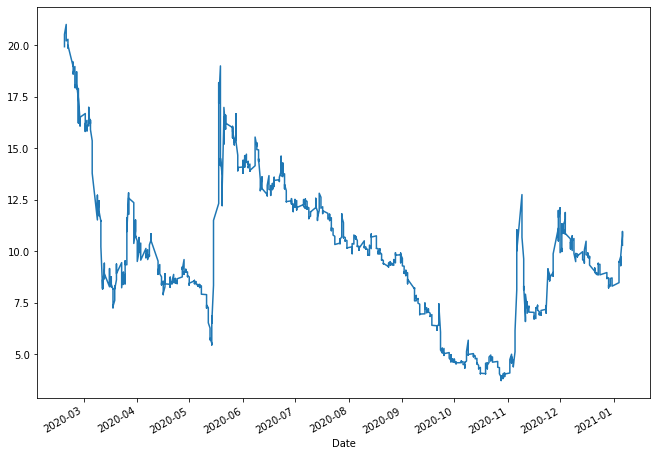

ADBE
2020-02-19
483.739990234375      price  price_  strike     bid     ask    spread
0   483.73  483.73   230.0  263.50  272.95  0.965378
1   483.73  483.73   240.0  252.50  257.50  0.980583
2   483.73  483.73   250.0  246.50  255.45  0.964964
3   483.73  483.73   260.0  221.75  231.00  0.959957
4   483.73  483.73   270.0  230.00  239.50  0.960334
5   483.73  483.73   280.0  221.60  231.50  0.957235
6   483.73  483.73   290.0  228.00  237.50  0.960000
7   483.73  483.73   300.0  206.20  214.40  0.961754
8   483.73  483.73   310.0  184.50  192.70  0.957447
9   483.73  483.73   320.0  191.35  198.90  0.962041
10  483.73  483.73   330.0  180.75  185.50  0.974394
11  483.73  483.73   340.0  177.15  185.40  0.955502
12  483.73  483.73   350.0  170.20  178.95  0.951104
13  483.73  483.73   360.0  175.05  184.30  0.949810
14  483.73  483.73   370.0  143.30  151.85  0.943694
15  483.73  483.73   380.0  150.40  158.95  0.946209
16  483.73  483.73   390.0  144.00  152.45  0.944572
17  483.73  4

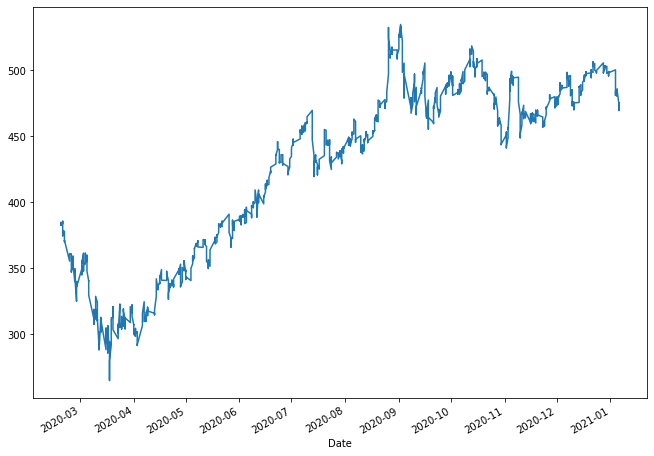

AMC
2020-02-19
3.859999895095825    price price_  strike   bid   ask    spread
0   3.85   3.85     0.5  1.78  2.04  0.872549
1   3.85   3.85     1.0  1.61  1.86  0.865591
2   3.85   3.85     1.5  1.55  1.66  0.933735
3   3.85   3.85     2.0  1.50  1.59  0.943396
4   3.85   3.85     2.5  1.40  1.54  0.909091
5   3.85   3.85     3.0  1.28  1.36  0.941176
6   3.85   3.85     3.5  1.24  1.30  0.953846
7   3.85   3.85     4.0  1.13  1.34  0.843284
8   3.85   3.85     4.5  1.05  1.34  0.783582
9   3.85   3.85     5.0  0.99  1.00  0.990000
10  3.85   3.85     5.5  0.88  1.20  0.733333
11  3.85   3.85     7.0  0.70  0.95  0.736842
12  3.85   3.85    10.0  0.63  0.71  0.887324
13  3.85   3.85    12.0  0.48  0.52  0.923077


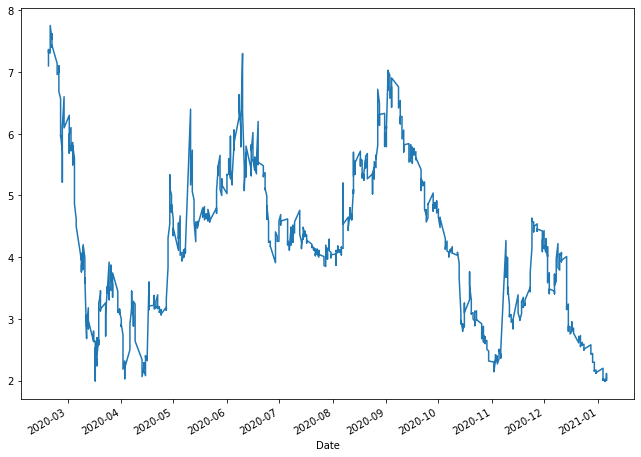

AMD
2020-02-19
89.83000183105469     price price_  strike    bid    ask    spread
0   89.83  89.83    40.0  55.65  60.35  0.922121
1   89.83  89.83    42.5  53.65  58.45  0.917879
2   89.83  89.83    45.0  52.25  56.25  0.928889
3   89.83  89.83    47.5  50.05  54.95  0.910828
4   89.83  89.83    50.0  48.80  53.00  0.920755
5   89.83  89.83    55.0  44.60  49.40  0.902834
6   89.83  89.83    60.0  41.50  46.30  0.896328
7   89.83  89.83    65.0  38.10  42.75  0.891228
8   89.83  89.83    67.5  38.20  41.20  0.927184
9   89.83  89.83    70.0  37.05  40.05  0.925094
10  89.83  89.83    72.5  34.70  39.30  0.882952
11  89.83  89.83    75.0  34.90  36.85  0.947083
12  89.83  89.83    77.5  32.95  35.90  0.917827
13  89.83  89.83    80.0  31.85  33.10  0.962236
14  89.83  89.83    82.5  30.85  32.25  0.956589
15  89.83  89.83    85.0  30.00  31.65  0.947867
16  89.83  89.83    87.5  29.10  30.35  0.958814
17  89.83  89.83    90.0  28.15  29.10  0.967354
18  89.83  89.83    92.5  27.25  28.

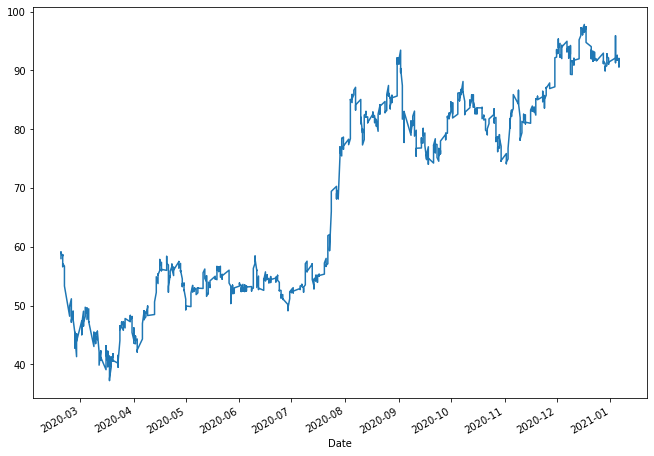

AMGN
2020-02-19
229.85000610351562      price  price_  strike     bid     ask    spread
0   229.85  229.85   110.0  126.00  131.00  0.961832
1   229.85  229.85   115.0  110.00  115.00  0.956522
2   229.85  229.85   120.0  116.00  121.00  0.958678
3   229.85  229.85   125.0  101.50  106.50  0.953052
4   229.85  229.85   130.0  106.00  111.00  0.954955
5   229.85  229.85   140.0   95.00   99.00  0.959596
6   229.85  229.85   145.0   81.50   86.50  0.942197
7   229.85  229.85   150.0   87.50   92.50  0.945946
8   229.85  229.85   155.0   83.00   88.00  0.943182
9   229.85  229.85   160.0   78.50   83.50  0.940120
10  229.85  229.85   165.0   66.00   70.50  0.936170
11  229.85  229.85   170.0   71.20   75.45  0.943671
12  229.85  229.85   175.0   67.00   72.00  0.930556
13  229.85  229.85   180.0   63.55   67.95  0.935247
14  229.85  229.85   190.0   56.50   61.50  0.918699
15  229.85  229.85   195.0   53.10   57.90  0.917098
16  229.85  229.85   200.0   50.00   55.00  0.909091
17  229.85 

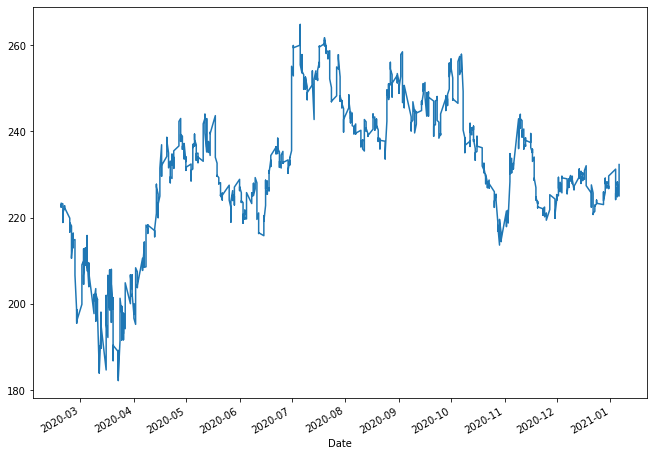

AMZN
2020-02-19
3104.199951171875        price   price_  strike      bid      ask    spread
0    3104.19  3104.19  1460.0  1779.95  1793.00  0.992722
1    3104.19  3104.19  1480.0  1761.80  1776.00  0.992005
2    3104.19  3104.19  1500.0  1743.75  1758.00  0.991894
3    3104.19  3104.19  1520.0  1664.85  1679.00  0.991572
4    3104.19  3104.19  1540.0  1660.45  1670.00  0.994281
..       ...      ...     ...      ...      ...       ...
121  3104.19  3104.19  4750.0   215.85   227.15  0.950253
122  3104.19  3104.19  4800.0   208.80   219.65  0.950603
123  3104.19  3104.19  4900.0   195.00   206.15  0.945913
124  3104.19  3104.19  5000.0   181.95   193.00  0.942746
125  3104.19  3104.19  5100.0   169.85   179.50  0.946240

[126 rows x 6 columns]


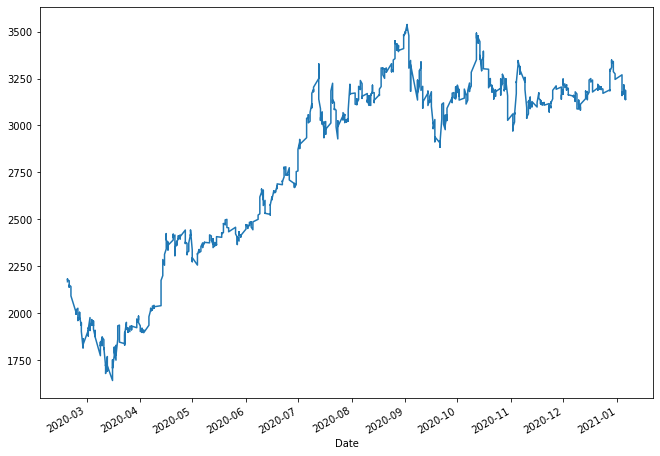

ATVI
2020-02-19
82.58000183105469     price price_  strike    bid    ask    spread
0   82.58  82.58    37.5  52.60  57.35  0.917175
1   82.58  82.58    40.0  50.75  54.70  0.927788
2   82.58  82.58    42.5  48.30  52.70  0.916509
3   82.58  82.58    45.0  36.00  41.00  0.878049
4   82.58  82.58    47.5  43.35  47.30  0.916490
5   82.58  82.58    50.0  41.70  46.40  0.898707
6   82.58  82.58    55.0  37.65  42.40  0.887972
7   82.58  82.58    60.0  34.20  38.90  0.879177
8   82.58  82.58    65.0  30.35  34.70  0.874640
9   82.58  82.58    67.5  23.45  27.10  0.865314
10  82.58  82.58    70.0  27.25  31.35  0.869219
11  82.58  82.58    72.5  25.80  29.65  0.870152
12  82.58  82.58    75.0  24.90  28.70  0.867596
13  82.58  82.58    77.5  23.75  27.50  0.863636
14  82.58  82.58    80.0  22.50  25.65  0.877193
15  82.58  82.58    82.5  21.35  23.60  0.904661
16  82.58  82.58    85.0  19.75  22.80  0.866228
17  82.58  82.58    87.5  18.40  21.30  0.863850
18  82.58  82.58    90.0  17.40  20

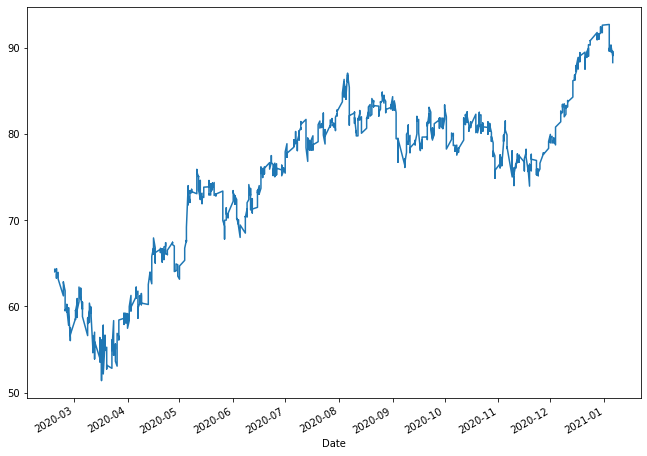

AXP
2020-02-19
121.2647933959961      price  price_  strike    bid    ask    spread
0   121.26  121.26    45.0  75.35  78.50  0.959873
1   121.26  121.26    50.0  69.40  72.35  0.959226
2   121.26  121.26    55.0  65.85  69.10  0.952967
3   121.26  121.26    60.0  60.65  64.50  0.940310
4   121.26  121.26    65.0  57.35  60.15  0.953450
5   121.26  121.26    70.0  52.95  56.15  0.943010
6   121.26  121.26    75.0  48.70  52.15  0.933845
7   121.26  121.26    80.0  45.00  48.35  0.930714
8   121.26  121.26    85.0  41.00  44.30  0.925508
9   121.26  121.26    90.0  37.40  40.85  0.915545
10  121.26  121.26    95.0  33.80  37.50  0.901333
11  121.26  121.26   100.0  30.45  34.35  0.886463
12  121.26  121.26   105.0  26.80  30.50  0.878689
13  121.26  121.26   110.0  24.60  28.60  0.860140
14  121.26  121.26   115.0  22.20  26.40  0.840909
15  121.26  121.26   120.0  19.95  23.70  0.841772
16  121.26  121.26   125.0  17.75  21.40  0.829439
17  121.26  121.26   130.0  15.50  19.85  0.78085

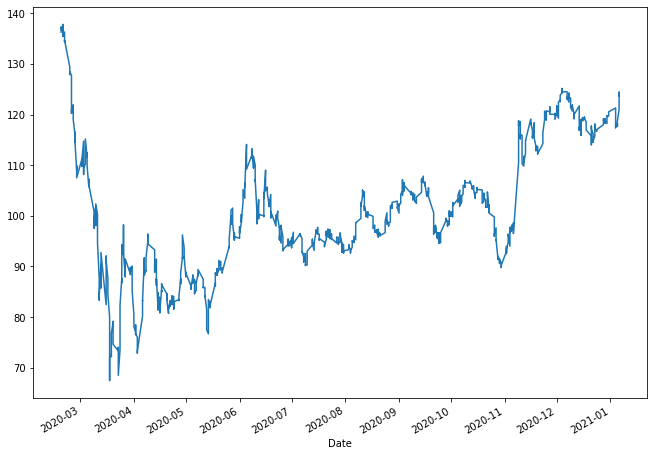

BA
2020-02-19
232.05999755859375      price  price_  strike     bid     ask    spread
0   232.05  232.05    75.0  138.15  142.25  0.971178
1   232.05  232.05    80.0  133.80  137.90  0.970268
2   232.05  232.05    85.0  129.50  133.50  0.970037
3   232.05  232.05    90.0  125.60  129.20  0.972136
4   232.05  232.05    95.0  121.40  125.25  0.969261
5   232.05  232.05   100.0  117.40  120.95  0.970649
6   232.05  232.05   105.0  113.40  117.00  0.969231
7   232.05  232.05   110.0  109.50  113.30  0.966461
8   232.05  232.05   115.0  105.75  109.10  0.969294
9   232.05  232.05   120.0  102.10  105.60  0.966856
10  232.05  232.05   125.0   98.50  102.10  0.964740
11  232.05  232.05   130.0   95.05   98.65  0.963507
12  232.05  232.05   135.0   91.85   95.20  0.964811
13  232.05  232.05   140.0   88.40   92.15  0.959305
14  232.05  232.05   145.0   85.25   88.80  0.960023
15  232.05  232.05   150.0   82.10   85.90  0.955763
16  232.05  232.05   155.0   79.15   82.95  0.954189
17  232.05  2

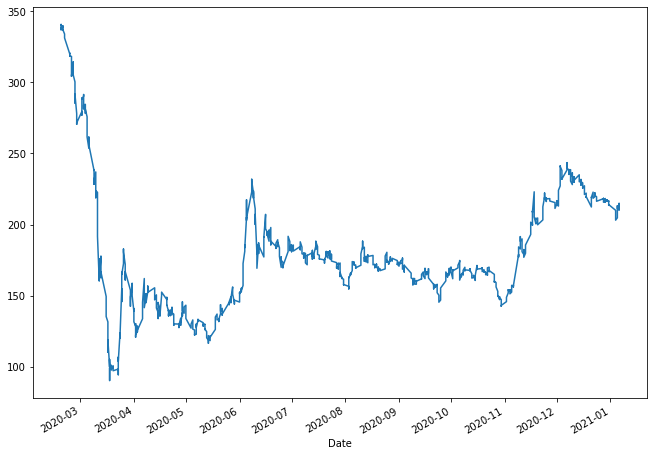

BABA
2020-02-19
263.79998779296875      price  price_  strike     bid     ask    spread
0   263.79  263.79   100.0  142.75  146.95  0.971419
1   263.79  263.79   110.0  134.50  138.65  0.970069
2   263.79  263.79   115.0  130.45  134.65  0.968808
3   263.79  263.79   120.0  126.50  130.70  0.967865
4   263.79  263.79   125.0  122.60  126.80  0.966877
5   263.79  263.79   130.0  118.80  122.25  0.971779
6   263.79  263.79   135.0  115.10  119.15  0.966009
7   263.79  263.79   140.0  111.45  115.65  0.963684
8   263.79  263.79   145.0  107.90  111.95  0.963823
9   263.79  263.79   150.0  104.45  108.20  0.965342
10  263.79  263.79   155.0  101.00  105.20  0.960076
11  263.79  263.79   160.0   97.70  101.90  0.958783
12  263.79  263.79   165.0   94.50   97.95  0.964778
13  263.79  263.79   170.0   91.35   95.55  0.956044
14  263.79  263.79   175.0   88.30   92.45  0.955111
15  263.79  263.79   180.0   85.35   89.50  0.953631
16  263.79  263.79   185.0   82.40   86.55  0.952051
17  263.79 

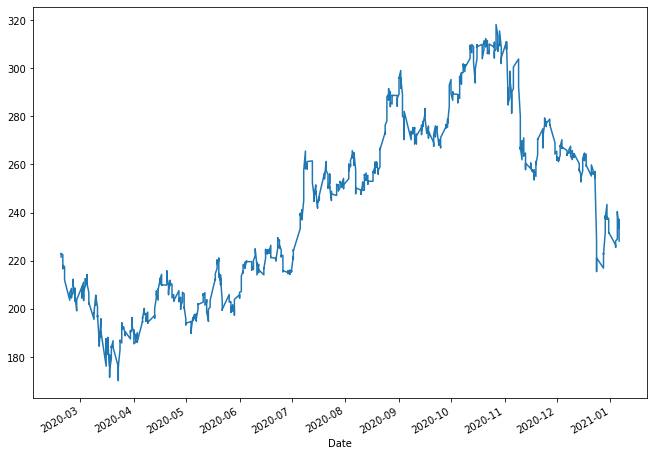

BAC
2020-02-19
28.799999237060547     price price_  strike    bid    ask    spread
0   28.79  28.79    15.0  17.35  17.85  0.971989
1   28.79  28.79    18.0  14.40  15.10  0.953642
2   28.79  28.79    20.0  12.95  13.45  0.962825
3   28.79  28.79    23.0  10.35  11.20  0.924107
4   28.79  28.79    25.0   9.45   9.70  0.974227
5   28.79  28.79    27.0   8.25   8.45  0.976331
6   28.79  28.79    30.0   6.60   6.90  0.956522
7   28.79  28.79    32.0   5.65   6.00  0.941667
8   28.79  28.79    35.0   4.30   4.65  0.924731
9   28.79  28.79    37.0   3.60   3.95  0.911392
10  28.79  28.79    40.0   3.00   3.05  0.983607
11  28.79  28.79    45.0   1.95   2.12  0.919811


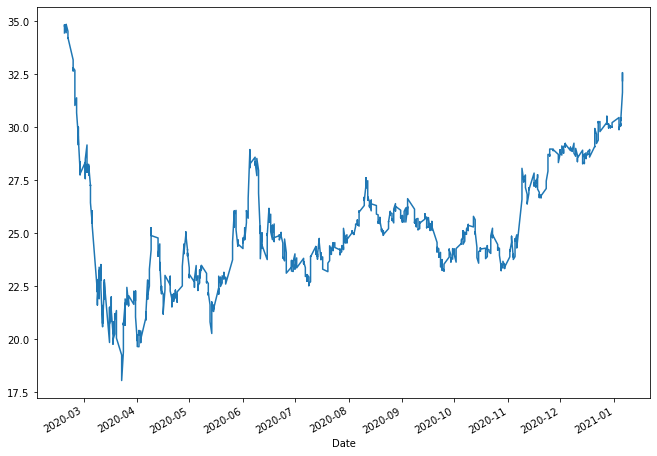

BLNK
2020-02-19
27.190000534057617     price price_  strike    bid    ask    spread
0   27.19  27.19     2.5  39.55  43.45  0.910242
1   27.19  27.19     5.0  36.85  40.85  0.902081
2   27.19  27.19     7.5  34.75  38.15  0.910878
3   27.19  27.19    10.0  32.75  36.05  0.908460
4   27.19  27.19    12.5  30.75  34.40  0.893895
5   27.19  27.19    15.0  28.90  33.35  0.866567
6   27.19  27.19    17.5  27.70  31.85  0.869702
7   27.19  27.19    20.0  26.55  28.50  0.931579
8   27.19  27.19    22.5  25.25  29.90  0.844482
9   27.19  27.19    25.0  24.85  27.40  0.906934
10  27.19  27.19    30.0  23.45  25.00  0.938000
11  27.19  27.19    35.0  22.00  25.25  0.871287
12  27.19  27.19    40.0  20.75  23.85  0.870021
13  27.19  27.19    45.0  19.55  22.35  0.874720
14  27.19  27.19    50.0  19.20  21.25  0.903529
15  27.19  27.19    55.0  17.60  20.20  0.871287
16  27.19  27.19    60.0  16.50  19.95  0.827068
17  27.19  27.19    65.0  15.80  18.50  0.854054
18  27.19  27.19    70.0  14.25  1

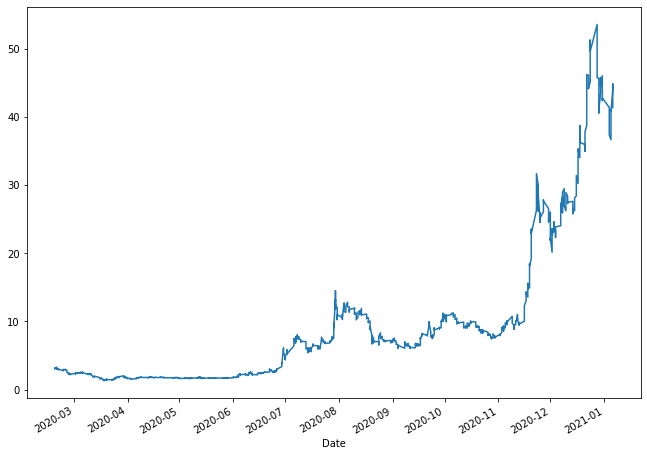

In [96]:
first, second = '2020-02-19', '2021-01-07'
figsize(11, 8)

#Day Charts
for i in total[2:14]:
    #get data on this ticker
    tk = yf.Ticker(i)

    #get the historical prices for this ticker year-month-day
    tickerDf = tk.history(period='1d', interval = "1h",
                                  start=first, end=second)
    tickerDf['Open'].plot(subplots=True)
#     plt.tight_layout()
    print(i)
    print(first)
    goo = tk.option_chain('2023-01-20')[0]

    za = pd.DataFrame()

    n = tk.history().iloc[0]['Close']
    p = ''.join(str(n).split('.')[0]+'.'+str(n).split('.')[1][:2])

    za['price'] = [p for x in range(len(goo['bid'])) ]
    za['price_'] = p
    za['strike'] = goo['strike']
    za['bid'] = goo['bid']
    za['ask'] = goo['ask']
    za['spread'] = [(goo['bid'][x] / goo['ask'][x]) for x in range(len(goo))]
    
    print(n, za)
    plt.show(i)

In [ ]:
the_dow = [
'MMM',
'AXP',
'AMGN',
'AAPL',
'BA',
'CAT',
'CVX',
'CSCO',
'KO',
'DOW',
'GS',
'HD',
'HON',
'IBM',
'INTC',
'JNJ',
'JPM',
'MCD',
'MRK',
'MSFT',
'NKE',
'PG',
'CRM',
'TRV',
'UNH',
'VZ',
'V',
'WBA',
'WMT',
'DIS']

In [ ]:
for i in total:
    #get data on this ticker
    tickerData = yf.Ticker(i)

    #get the historical prices for this ticker
    tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2020-12-14')
    tickerDf['Open'].plot(subplots=True)
    plt.tight_layout()
    print(i)
    plt.show(i)

In [ ]:
nyse = mcal.get_calendar('NYSE')
days = nyse.valid_days(start_date='2020-10-1', end_date='2020-11-30')

In [ ]:
count = 0
first, second = '2020-11-29', '2020-11-30'

In [ ]:
two_days = list(days)[count:count+2]
count += 1
previous_day1 = str(two_days[0]).split('\'')[0].split(' ')[0]
previous_day2 = str(two_days[1]).split('\'')[0].split(' ')[0]

# 1 Day
tickerData = yf.Ticker('MCD')
#get the historical prices for this ticker year-month-day
day_tickerDf = tickerData.history(period='1d', interval = "1h",
                              start=first, end=second)
two_days = list(days)[count:count+2]
# count += 1
first = str(two_days[0]).split('\'')[0].split(' ')[0]
second = str(two_days[1]).split('\'')[0].split(' ')[0]

# 15 Minutes
#get the historical prices for this ticker year-month-day
tickerDf = tickerData.history(period='1d', interval = "15m",
                              start=first, end=second)

In [ ]:
nyse = mcal.get_calendar('NYSE')
days = nyse.valid_days(start_date='2018-12-14', end_date='2020-12-21')

first, second = '2020-11-29', '2020-11-30'

In [ ]:
# m = []
fail = 0
m_d = []
m_one = []
m_two = []
d = {}

for tick in tqdm(total):
    print(tick)
    count = 0
    for i in tqdm(range(900)):
        try:
            two_days = list(days)[count:count+2]
            count += 1
            previous_day1 = str(two_days[0]).split('\'')[0].split(' ')[0]
            previous_day2 = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 1 Day
            tickerData = yf.Ticker(tick)
            #get the historical prices for this ticker year-month-day
            day_tickerDf = tickerData.history(period='1d',
                                          start=first, end=second)
            two_days = list(days)[count:count+2]
            count += 1
            first = str(two_days[0]).split('\'')[0].split(' ')[0]
            second = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 15 Minutes
            #get the historical prices for this ticker year-month-day
            tickerDf = tickerData.history(period='1d', interval = "1h",
                                          start=first, end=second)
    #             av = max(tickerDf['High'][:2])
    #             if av > day_tickerDf['Close'][0]:
    #                 percent = av / day_tickerDf['Close'][0] - 1
    #                 if percent > 0.03 and percent < 0.05:
    #                     print(percent)
            d[tick+' '+str(i)] = [['the day', tickerDf], ['yesterday', day_tickerDf['Close']]]


    #                     if min(tickerDf['Low'][2:] < (day_tickerDf['Close'][0] * 1.02)):

        except:
            fail += 1
            print(tick+' '+str(i))
            pass

In [ ]:
with open("day_ALL_128.txt", "wb") as myFile:
    pickle.dump(d, myFile)

In [ ]:
d = pickle.load(open('day_screened.txt', 'rb'))

In [ ]:
len(d)

In [ ]:
l = []

In [ ]:
for i in d.values():
    l.append(i[1][1])

In [ ]:
l[0]['High']

In [ ]:
for n, x in enumerate(d.values()):
    l[n]['Precent'] = x[0][1]

In [ ]:
max(l[8]['High'][:2]) < max(l[8]['High'][2:])

In [ ]:
l[8]['Low'][3:5]

In [ ]:
lo = [1,2,3,4,5,6,7,8,9, 10]
#  + [1,2,3,4,5,6,7,8,9][4:])

In [ ]:
m_d = []
for i in l:
    if max(i['High'][:2]) < (max(i['Low'][2:4]) * 1.02):
        m_d.append(1)
    else:
        m_d.append(0)

In [ ]:
percent = [x[0][1] for x in d.values()]

In [ ]:
l[5][::2]

In [ ]:
3499/ 6

In [ ]:
b = 0
m_d = []
v = 2
for i in d.values():
#     print(max(i[2][1]))
    if max(lo[:v] + lo[v+1:]) > lo[:v+1] + lo[v+2:]):
#         if min(i[1][1]['Low']) < max(i[2][1])*1.01:
        m_d.append(1)
    else:
        m_d.append(0)

In [ ]:
lo[v]

In [ ]:
max(lo[:v] + lo[v+1:])

In [ ]:
print(max(list(l[9]['High'][:v]) + list(l[9]['High'][v+1:])))

In [ ]:
len(l) / 7

In [ ]:
l[9]['High'][v+1:]

In [ ]:
for i in d.values():
    print(i[1][1])

In [ ]:
b = 0
m_d = []
v = 2
for i in d.values():
    print(i[1][1]['High'][v])
    print(max(i[1][1]['High'][:v] + i[1][1]['High'][v+1:]))
    if i[1][1]['High'][v] > max(list(i[1][1]['High'][:v]) + list(i[1][1]['High'][v+1:])):
#         if min(i[1][1]['Low']) < max(i[2][1])*1.01:
        m_d.append(1)
    else:
        m_d.append(0)
#     else:
#         b += 1

In [ ]:
[1,2,3,4,5,6,7][:6]

In [ ]:
# 758 is average

In [ ]:
l[0]['High'][v]

In [ ]:
d_day_onePercent = {}

In [ ]:
[i for i in range(7)][6]

In [ ]:
[i for i in range(7)][:6]

In [ ]:
[i for i in range(7)][6:]

In [ ]:
b = 0
m_d = []
# v = 2
# for v in range(7):
for x in l:
#     print(i['High'][v])
    i = x['High'].tolist()
    if len(i) > 6:
#             if i[v] > max(i[:v] + i[v+1:]):
        if max(i[:6]) > i[6]:
            m_d.append(1)
        else:
            m_d.append(0)
        b += 1
#     d_day_onePercent[v] = m_d.count(1)

In [ ]:
m_d.count(1)

In [ ]:
m_d.count(0)

In [ ]:
b = 0
m_d = []
# v = 2

for n, x in enumerate(l):
    i = x['High'].tolist()
    c = x['Low'].tolist()
    if len(i) > 6:
        argmax[np.argmax(i)] += 1
        argmin[np.argmin(c)] += 1
        m_d.append(len(i))
#         if max(i[:6]) > i[6]:
#             m_d.append(1)
#         else:
#             m_d.append(0)
        b += 1

In [ ]:
b

In [ ]:
argmax = [0,0,0,0,0,0,0,0]
argmin = [0,0,0,0,0,0,0,0]

In [ ]:
o = l[7]['High'].tolist()
o

In [ ]:
np.argmax(o)

In [ ]:
zs[np.argmax(o)] += 1

In [ ]:
zs

In [ ]:
# Highest price in the 1st two hours was 3 to 5% above yest. close
argmin, argmax

In [ ]:
sum(argmax)

In [ ]:
sum(argmin)

In [ ]:
d_day_onePercent

In [ ]:
d_day

In [ ]:
sum([1983, 465, 301, 247, 295, 306, 672])

In [ ]:
b

In [ ]:
# Highest in hour 1
m_d.count(1)

In [ ]:
# Highest after hour 1
m_d.count(0)

In [ ]:
b

In [ ]:
len(d.values()) - b

In [ ]:
for x in l[6]:

In [ ]:
    if min(tickerDf['Low'][2:] < (day_tickerDf['Close'][0] * 1.02)):
        m_d.append(1)
    else:
        m_d.append(0)
    if max(tickerDf['High'][:2]) > max(tickerDf['High'][2:]):
        m_d.append(1)
    else:
        m_d.append(0)
    if max(tickerDf['High'][:2]) * 1.01 > max(tickerDf['High'][2:]):
        m_one.append(1)
    else:
        m_one.append(0)
    if max(tickerDf['High'][:2]) * 1.02 > max(tickerDf['High'][2:]):
        m_two.append(1)
    else:
        m_two.append(0)

In [ ]:
# m = []
m_d = []
m_one = []
m_two = []

for tick in tqdm(d):
    print(tick)
    count = 0
    for i in range(900):
        try:
            two_days = list(days)[count:count+2]
            count += 1
            previous_day1 = str(two_days[0]).split('\'')[0].split(' ')[0]
            previous_day2 = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 1 Day
            tickerData = yf.Ticker(tick)
            #get the historical prices for this ticker year-month-day
            day_tickerDf = tickerData.history(period='1d',
                                          start=first, end=second)
            two_days = list(days)[count:count+2]
            count += 1
            first = str(two_days[0]).split('\'')[0].split(' ')[0]
            second = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 15 Minutes
            #get the historical prices for this ticker year-month-day
            tickerDf = tickerData.history(period='1d', interval = "1h",
                                          start=first, end=second)
            av = max(tickerDf['High'][:2])
            if av > day_tickerDf['Close'][0]:
                percent = av / day_tickerDf['Close'][0] - 1
                if percent > 0.03 and percent < 0.05:
                    print(percent)
    #                 tickerDf['Open'].plot(subplots=False, layout=(1,2))
    #                 plt.show()
    
                    if min(tickerDf['Low'][2:] < (day_tickerDf['Close'][0] * 1.02)):
                        m_d.append(1)
                    else:
                        m_d.append(0)
# if max(tickerDf['High'][:2]) > max(tickerDf['High'][2:]):
#                         m_d.append(1)
#                     else:
#                         m_d.append(0)
#                     if max(tickerDf['High'][:2]) * 1.01 > max(tickerDf['High'][2:]):
#                         m_one.append(1)
#                     else:
#                         m_one.append(0)
#                     if max(tickerDf['High'][:2]) * 1.02 > max(tickerDf['High'][2:]):
#                         m_two.append(1)
#                     else:
#                         m_two.append(0)
        except:
            pass

In [ ]:
if av > day_tickerDf['Close'][0]:
    percent = av / day_tickerDf['Close'][0] - 1

In [ ]:
m_two.count(1)

In [ ]:
m_two.count(0)

In [ ]:
m_one.count(1)

In [ ]:
m_one.count(0)

In [ ]:
m_d.count(1)

In [ ]:
m_d.count(0)

In [ ]:
m_one.count(1)

In [ ]:
m_one.count(0)

In [ ]:
m_d.count(1)

In [ ]:
m_d.count(0)

In [ ]:
1.01

In [ ]:
m_d.count(1)

In [ ]:
m_d.count(0)

In [ ]:
m.count(1)

In [ ]:
m.count(0)

In [ ]:
m2.count(1)

In [ ]:
m2.count(0)

In [ ]:
nyse = mcal.get_calendar('NYSE')
days = nyse.valid_days(start_date='2020-10-01', end_date='2020-12-14')

In [ ]:
first, second = '2020-11-29', '2020-11-30'
# m = []
dow = []
for tick in tqdm(the_dow):
    count = 0
    for i in range(100):
        try:
            two_days = list(days)[count:count+2]
            count += 1
            previous_day1 = str(two_days[0]).split('\'')[0].split(' ')[0]
            previous_day2 = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 1 Day
            tickerData = yf.Ticker(tick)
            #get the historical prices for this ticker year-month-day
            day_tickerDf = tickerData.history(period='1d',
                                          start=first, end=second)
            two_days = list(days)[count:count+2]
            count += 1
            first = str(two_days[0]).split('\'')[0].split(' ')[0]
            second = str(two_days[1]).split('\'')[0].split(' ')[0]

            # 15 Minutes
            #get the historical prices for this ticker year-month-day
            tickerDf = tickerData.history(period='1d', interval = "15m",
                                          start=first, end=second)
            if tickerDf['Close'][:4].mean() > day_tickerDf['Close'][0]:
                percent = tickerDf['Close'][:4].mean() / day_tickerDf['Close'][0] - 1
                if percent > 0.03:
                    print(percent)
    #                 tickerDf['Open'].plot(subplots=False, layout=(1,2))
    #                 plt.show()
                    if max(tickerDf['Close'][:4]) > max(tickerDf['Close'][4:]):
                        dow.append(1)
                    else:
                        dow.append(0)
        except:
            pass

In [ ]:
tickerDf['Open'].plot

In [ ]:
tickerDf['Open'].plot

In [ ]:
tickerDf['Open'].plot

In [ ]:
tickerDf['Open'].plot

In [ ]:
if tickerDf['Close'][:8].mean() > day_tickerDf['Close'][0]:
    percent = tickerDf['Close'][:8].mean() / day_tickerDf['Close'][0] - 1
    if percent > 0.03:
        print(percent)
        tickerDf['Open'].plot(subplots=True)

In [ ]:
day_tickerDf

In [2]:
first, second = '2020-02-19', '2021-01-07'

In [5]:
figsize(8, 8)

In [4]:
first, second = '2020-02-19', '2021-01-07'
figsize(8, 8)

#Day Charts
for i in total:
    #get data on this ticker
    tickerData = yf.Ticker(i)

    #get the historical prices for this ticker year-month-day
    tickerDf = tickerData.history(period='1d', interval = "1h",
                                  start=first, end=second)
    tickerDf['Open'].plot(subplots=True)
#     plt.tight_layout()
    print(i)
    print(first)
    plt.show(i)

NameError: name 'total' is not defined